In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import gc
from datetime import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from tqdm import tqdm

%matplotlib inline

%load_ext autoreload
%autoreload 2


In [2]:
# Plotting parameters
# rc('text', usetex=False)
small_size = 15
medium_size = 25
bigger_size = 30
plt.rc('font', size=small_size)          # controls default text sizes
plt.rc('axes', titlesize=small_size)    # fontsize of the axes title
plt.rc('axes', labelsize=small_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)    # legend fontsize
plt.rc('figure', titlesize=small_size)  # fontsize of the figure title
plt.rc('text', usetex = False)


# Files/folders/parameters

In [3]:
# File and folder paths
dir_case = Path("/people/jian449/KIM/examples/im_cloudmodel")
f_para = dir_case / "data" / "Output_512.csv"
f_state = dir_case / "data" / "Input_512.csv"


In [4]:
df_para, df_state = pd.read_csv(f_para),pd.read_csv(f_state)

In [ ]:
y_vars, x_vars = df_para.keys().to_list(), df_state.keys().to_list()
y, x = df_para.values, df_state.values

In [6]:
x.shape, y.shape

((513, 1458), (513, 2))

# Ensemble plots

In [8]:
df_para.head()

,lambda_w,log10(lambda_c)
0,1.000,0.000000
1,0.732,1.755715
2,1.758,-0.057992
3,1.422,0.954194
4,1.133,-1.236572


In [7]:
df_state.head()

,s1_t35_Wstd,s1_t35_Tmean,s1_t35_Tstd,s1_t35_SSmean,s1_t35_SSstd,s1_t35_Rmean,s1_t35_Rstd,s1_t35_Rskew,s1_t35_Rkurt,s1_t40_Wstd,...,s27_t55_Rkurt,s27_t60_Wstd,s27_t60_Tmean,s27_t60_Tstd,s27_t60_SSmean,s27_t60_SSstd,s27_t60_Rmean,s27_t60_Rstd,s27_t60_Rskew,s27_t60_Rkurt
0,0.027592,290.106739,0.110757,0.000083,0.027469,9.540161,5.252570,0.679226,3.612259,0.039589,...,4.010519,0.093883,291.816900,0.184003,0.041209,0.067320,9.703295,5.369576,0.747080,4.028701
1,0.036179,290.174376,0.116023,0.118213,0.168723,6.422273,4.724950,2.381633,13.156859,0.038023,...,15.321329,0.098971,291.417376,0.182353,0.466858,0.458424,7.204470,4.903227,2.447047,15.784750
2,0.043151,289.717620,0.208471,0.011540,0.060575,10.890016,6.356394,0.692165,3.595036,0.056586,...,4.387643,0.117781,292.168165,0.307489,0.140109,0.171516,11.607142,6.721432,0.810832,4.253723
3,0.041056,289.668012,0.194905,0.077721,0.111630,8.904042,6.493191,1.400587,5.966682,0.046308,...,8.724625,0.105407,291.818537,0.260940,0.438218,0.398038,9.648220,6.769059,1.702045,8.351530
4,0.042066,290.073173,0.185257,0.001571,0.028063,9.951453,5.111905,0.469584,3.043128,0.046807,...,3.107623,0.097971,291.850256,0.272889,0.039104,0.073307,10.184495,5.257679,0.503162,3.149103


In [28]:
locs = list(set([int(xv.split('_')[0][1:]) for xv in x_vars]))
times = list(set([int(xv.split('_')[1][1:]) for xv in x_vars]))
varns = list(set([xv.split('_')[2] for xv in x_vars]))

cmap1 = plt.cm.Blues_r
colors1 = cmap1(np.linspace(0.2, 0.8, 9))
cmap2 = plt.cm.Oranges_r
colors2 = cmap2(np.linspace(0.2, 0.8, 9))
cmap3 = plt.cm.Greys_r
colors3 = cmap3(np.linspace(0.2, 0.8, 9))
colors = np.concat([colors1, colors2, colors3])

ylabels = ['$\lambda_w$', '$\log_{10}(\lambda_c)$']


<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'


/tmp/ipykernel_23226/778815748.py:13: SyntaxWarning: invalid escape sequence '\l'
  ylabels = ['$\lambda_w$', '$\log_{10}(\lambda_c)$']
/tmp/ipykernel_23226/778815748.py:13: SyntaxWarning: invalid escape sequence '\l'
  ylabels = ['$\lambda_w$', '$\log_{10}(\lambda_c)$']


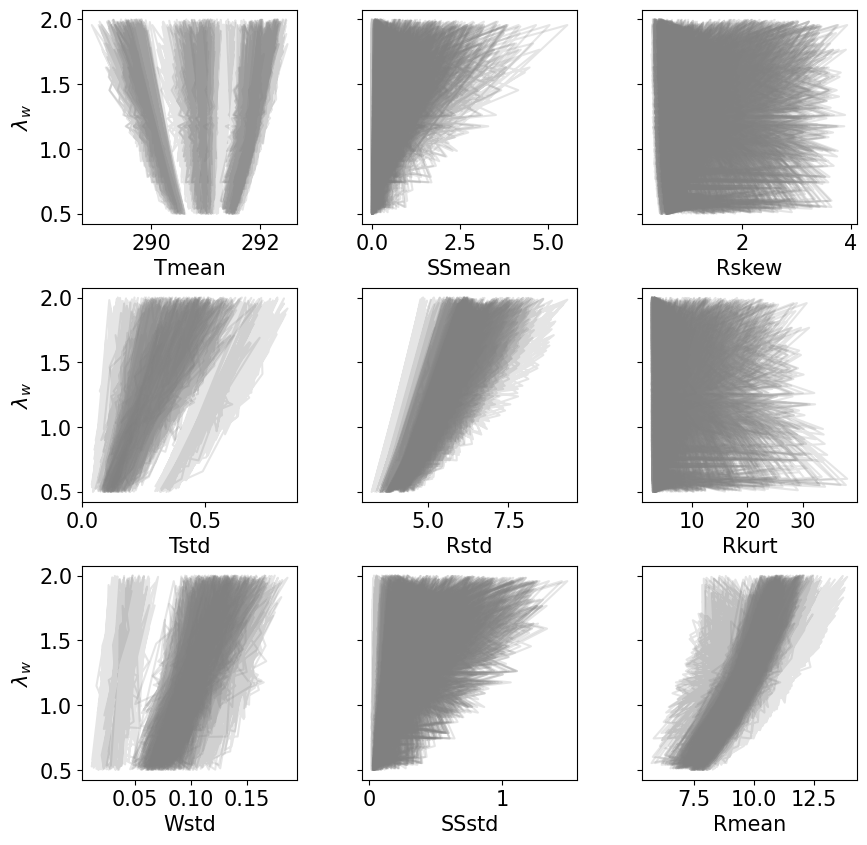

In [26]:
# First parameters
fig, axes = plt.subplots(3, 3, figsize=(10,10), sharey=True)
axes = axes.flatten()
for i,varn in enumerate(varns):
    ax = axes[i]
    for xv in x_vars:
        loc, t, v = int(xv.split('_')[0][1:]), int(xv.split('_')[1][1:]), xv.split('_')[2]
        if v == varn and t == times[-1]:
            c = colors[locs.index(loc)]
            ax.plot(df_state[xv], df_para.iloc[:,0], color='grey', alpha=0.2)
            ax.set(xlabel=varn, ylabel=ylabels[0] if i in [0,3,6] else '')
plt.subplots_adjust(wspace=0.3, hspace=0.3)


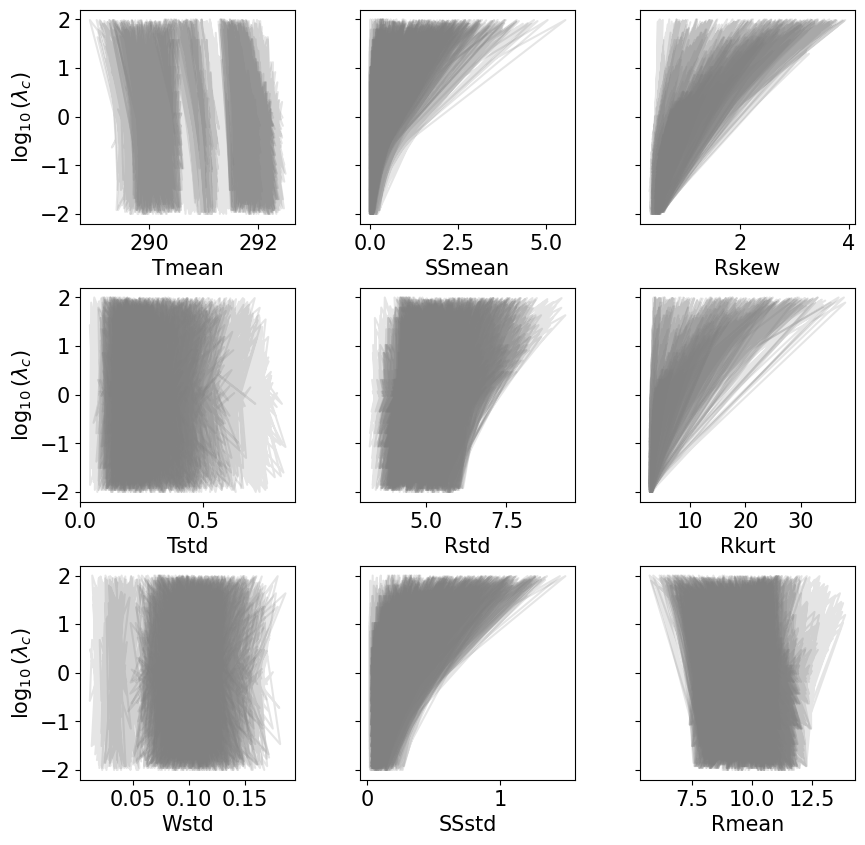

In [29]:
# Second parameters
fig, axes = plt.subplots(3, 3, figsize=(10,10), sharey=True)
axes = axes.flatten()
for i,varn in enumerate(varns):
    ax = axes[i]
    for xv in x_vars:
        loc, t, v = int(xv.split('_')[0][1:]), int(xv.split('_')[1][1:]), xv.split('_')[2]
        if v == varn and t == times[-1]:
            c = colors[locs.index(loc)]
            ax.plot(df_state[xv], df_para.iloc[:,1], color='grey', alpha=0.2)
            ax.set(xlabel=varn, ylabel=ylabels[1] if i in [0,3,6] else '')
plt.subplots_adjust(wspace=0.3, hspace=0.3)

